<h1 style="color: #aadafa; text-align: center; font-size: 48px; margin-bottom: 0.2em;">
PW 1 - Markovian models  
<h1>
<p style="text-align: center; font-size: 18px; margin-top: 0.5em;">
<strong> Marie Pizzini</strong> 
</p>
<p style="text-align: center; font-size: 18px; margin-top: 0.5em;">
Telecom Paris - November 2023
</p>



Sampling of Markovian models.

The aim of this session is to program the Gibbs sampler algorithm and study it in the binary case.

In this section we consider a binary Markov random field (taking values in $E=\{0,1\}$).
The neighborhood is defined in 4-connexity and the potential of a clique of order 2 is defined by :
$U_c(0,1)=U_c(1,0)=+\beta$ and $U_c(1,1)=U_c(0,0)=0$ (the potential for singleton clique is 0).


In [2]:
import math
import random
import numpy as np
import platform
import tempfile
import os
import matplotlib.pyplot as plt
import imageio
from scipy import ndimage as ndi

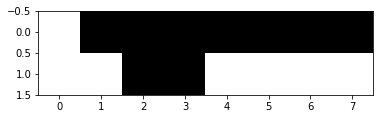

In [3]:
plt.set_cmap('gray')

sh=[2,8]

imaU=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaU)

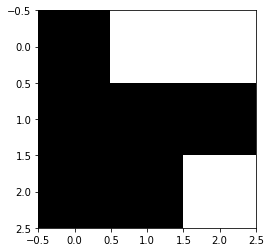

In [4]:
sh=[3,3]

imaVois=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaVois)

## Part 1

Programming the Gibbs sampler and drawing samples of Markovian models



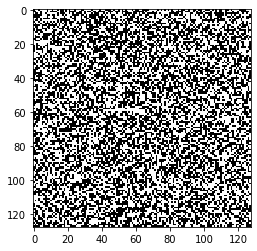

In [5]:
plt.set_cmap('gray')

sh=[128,128]

im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

### Sampling function
Complete the following function which takes as input a binary image (which will be updated by Gibbs sampling) and the value of the regularization parameter.


In [6]:
def echan(im_bin,beta_reg):

    i=0
    j=0

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices
          # they allow access to neighboring pixels
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]
            coordinates = [(i1,j),(i2,j),(i,j1),(i,j2)]
        # complete the calculation of energies and associated probabilities
        # energy and non-normalized proba when the pixel is put in class 0
            Ureg0= np.sum([im_bin[coordinate] for coordinate in coordinates])*beta_reg
            p0=math.exp(-Ureg0)

        # energy and non-normalized proba when the pixel is put in class 1
            Ureg1= np.sum([1-im_bin[coordinate] for coordinate in coordinates])*beta_reg
            p1=math.exp(-Ureg1)

        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]=0
                else :
                    im_bin[i,j]=1

    return im_bin


By varying the value of the regularization parameter and restarting the cell, observe. You can remove the visualization during sampling and increase the number of iterations

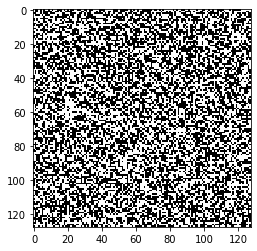

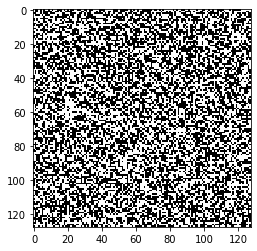

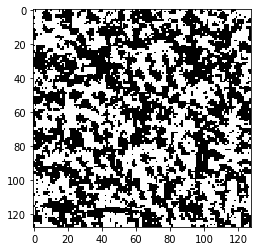

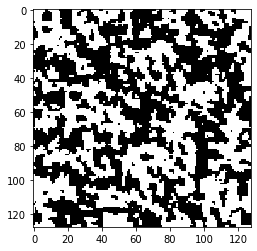

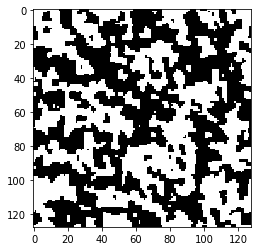

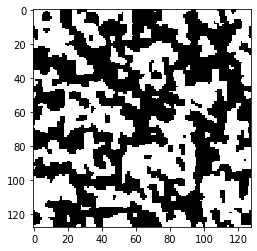

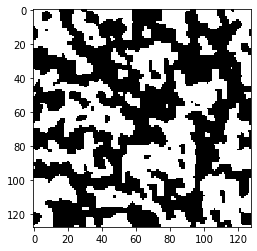

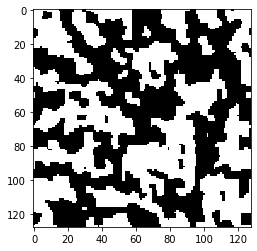

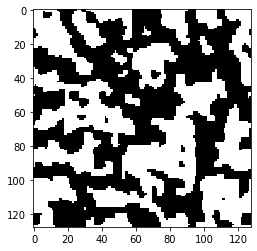

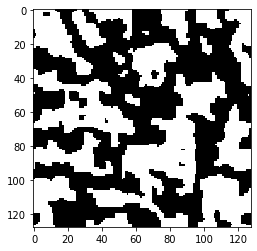

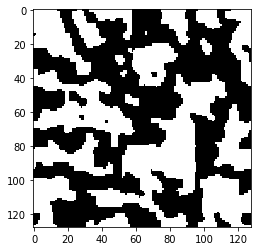

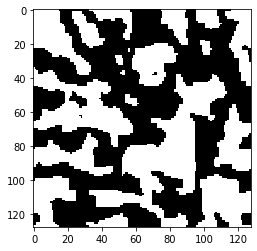

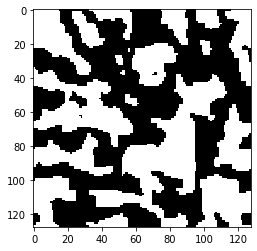

In [7]:

# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg=20

mafigure=plt.figure()
plt.imshow(im_bin)
mafigure.canvas.draw()
plt.show()

for n in range(10):
    echan(im_bin,beta_reg)
    plt.imshow(im_bin)
    mafigure.canvas.draw()
    plt.show(block=False)


plt.figure()
plt.imshow(im_bin)
plt.show()

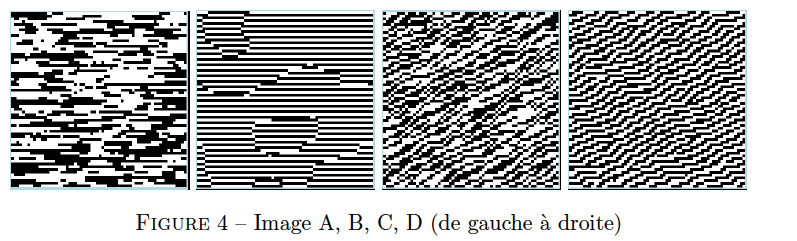

## Image A

In [12]:
def echan_A(im_bin,beta_reg):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices 
          # they allow access to neighboring pixels  
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # complete the calculation of energies and associated probabilities 
        # energy and non-normalized proba when the pixel is put in class 0
            Ureg0=0
            if (im_bin[i][j1]==0) or (im_bin[i][j2]==0):
                Ureg0-=beta_reg
            
                
            p0=math.exp(-Ureg0);

        # energy and non-normalized proba when the pixel is put in class 1
            Ureg1=0
            if (im_bin[i][j1]==1) or (im_bin[i][j2]==1):
                Ureg1-=beta_reg
           
            p1=math.exp(-Ureg1);

        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]=0
                else :
                    im_bin[i,j]=1

    return im_bin

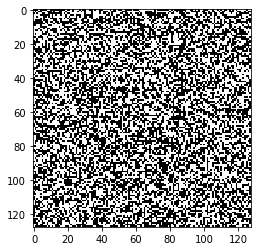

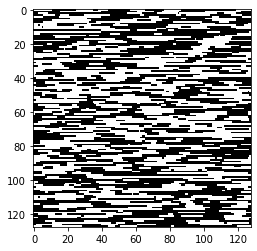

In [13]:
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg=20

mafigure=plt.figure()


for n in range(10):
    echan_A(im_bin,beta_reg)
plt.imshow(im_bin)


## Image B

In [30]:
def echan_B(im_bin,beta_reg):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices 
          # they allow access to neighboring pixels  
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]
            
        # complete the calculation of energies and associated probabilities 
        # energy and non-normalized proba when the pixel is put in class 0
            Ureg0=0
            if (im_bin[i1][j]==0):
                Ureg0+=beta_reg
            if (im_bin[i2][j]==0):
                Ureg0+=beta_reg
            if (im_bin[i][j1]==0):
                Ureg0-=beta_reg
            if (im_bin[i][j2]==0):
                Ureg0-=beta_reg
                
            p0=math.exp(-Ureg0);

        # energy and non-normalized proba when the pixel is put in class 1
            Ureg1=0
            if (im_bin[i1][j]==1):
                Ureg1+=beta_reg
            if (im_bin[i2][j]==1):
                Ureg1+=beta_reg
            if (im_bin[i][j1]==1):
                Ureg1-=beta_reg
            if (im_bin[i][j2]==1):
                Ureg1-=beta_reg
                
            p1=math.exp(-Ureg1);

        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]=0
                else :
                    im_bin[i,j]=1

    return im_bin

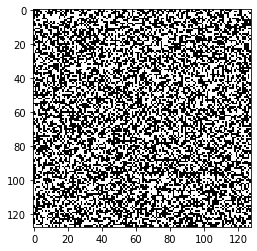

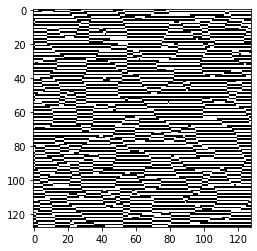

In [31]:
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg=20

mafigure=plt.figure()


for n in range(10):
    echan_B(im_bin,beta_reg)
plt.imshow(im_bin)

## Image C 

In [26]:
def echan_C(im_bin,beta_reg):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices 
          # they allow access to neighboring pixels  
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]
            
        # complete the calculation of energies and associated probabilities 
        # energy and non-normalized proba when the pixel is put in class 0
            Ureg0=0
            if (im_bin[i1][j]==0):
                Ureg0+=beta_reg
            if (im_bin[i2][j]==0):
                Ureg0+=beta_reg
            if (im_bin[i][j1]==0):
                Ureg0-=beta_reg
            if (im_bin[i][j2]==0):
                Ureg0-=beta_reg
            if (im_bin[i2][j1]==0):
                Ureg0-=beta_reg
            if (im_bin[i1][j2]==0):
                Ureg0-=beta_reg
                
            p0=math.exp(-Ureg0);

        # energy and non-normalized proba when the pixel is put in class 1
            Ureg1=0
            if (im_bin[i1][j]==1):
                Ureg1+=beta_reg
            if (im_bin[i2][j]==1):
                Ureg1+=beta_reg
            if (im_bin[i][j1]==1):
                Ureg1-=beta_reg
            if (im_bin[i][j2]==1):
                Ureg1-=beta_reg
            if (im_bin[i2][j1]==1):
                Ureg1-=beta_reg
            if (im_bin[i1][j2]==1):
                Ureg1-=beta_reg
                
            p1=math.exp(-Ureg1);

        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]=0
                else :
                    im_bin[i,j]=1

    return im_bin

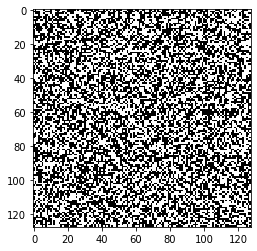

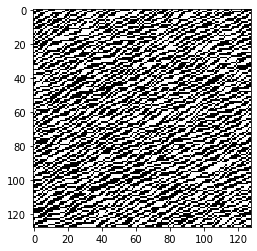

In [27]:
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg=20

mafigure=plt.figure()


for n in range(10):
    echan_C(im_bin,beta_reg)
plt.imshow(im_bin)

## Image D

In [32]:
def echan_D(im_bin,beta_reg):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices 
          # they allow access to neighboring pixels  
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]
            
        # complete the calculation of energies and associated probabilities 
        # energy and non-normalized proba when the pixel is put in class 0
            Ureg0=0
            if (im_bin[i1][j]==0):
                Ureg0+=beta_reg
            if (im_bin[i2][j]==0):
                Ureg0+=beta_reg
            if (im_bin[i][j1]==0):
                Ureg0-=beta_reg
            if (im_bin[i][j2]==0):
                Ureg0-=beta_reg
            if (im_bin[i2][j1]==0):
                Ureg0-=beta_reg
            if (im_bin[i1][j2]==0):
                Ureg0-=beta_reg
            if (im_bin[i1][j1]==0):
                Ureg0+=beta_reg
            if (im_bin[i2][j2]==0):
                Ureg0+=beta_reg
                
            p0=math.exp(-Ureg0);

        # energy and non-normalized proba when the pixel is put in class 1
            Ureg1=0
            if (im_bin[i1][j]==1):
                Ureg1+=beta_reg
            if (im_bin[i2][j]==1):
                Ureg1+=beta_reg
            if (im_bin[i][j1]==1):
                Ureg1-=beta_reg
            if (im_bin[i][j2]==1):
                Ureg1-=beta_reg
            if (im_bin[i2][j1]==1):
                Ureg1-=beta_reg
            if (im_bin[i1][j2]==1):
                Ureg1-=beta_reg
            if (im_bin[i1][j1]==1):
                Ureg1+=beta_reg
            if (im_bin[i2][j2]==1):
                Ureg1+=beta_reg
                
            p1=math.exp(-Ureg1);

        # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]=0
                else :
                    im_bin[i,j]=1

    return im_bin

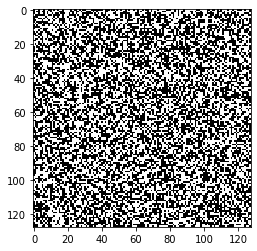

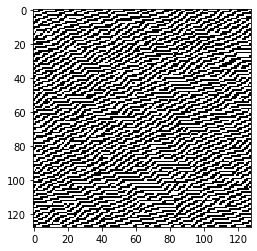

In [33]:
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg=20

mafigure=plt.figure()


for n in range(10):
    echan_D(im_bin,beta_reg)
plt.imshow(im_bin)

In [36]:
def echan_8(im_bin,beta_reg):

    i=0;
    j=0;

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          #ne pas modifier ces indices 
          #ils permettent d'accéder aux pixels voisins 
          # i1,j et i2,j et i,j1 et i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

        # compléter le calcul des énergies et proba assosiées 
        # énergie et proba non normalisée lorsque le pixel est mis dans la classe 0
            Ureg0=0
            if (im_bin[i1][j1]==1):
                Ureg0+=beta_reg
            if (im_bin[i2][j2]==1):
                Ureg0+=beta_reg
                
            p0=math.exp(-Ureg0);

        # énergie et proba non normalisée lorsque le pixel est mis dans la classe 1
            Ureg1=0
            if (im_bin[i1][j1]==0):
                Ureg1+=beta_reg
            if (im_bin[i2][j2]==0):
                Ureg1+=beta_reg
                
            p1=math.exp(-Ureg1);

        #tirage selon les probabilités normalisées NB la normalisation est effectuée ici
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]=0
                else :
                    im_bin[i,j]=1

    return im_bin

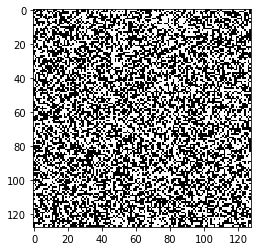

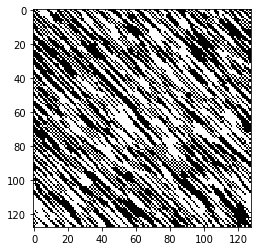

In [37]:
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg=20

mafigure=plt.figure()


for n in range(10):
    echan_8(im_bin,beta_reg)
plt.imshow(im_bin)